# Lecture 7: Tests for Multiple Group Comparisons

## Today's Learning Goals

By the end of this lecture, you should be able to:

1. Describe the various purposes of chi-square tests.
2. Perform chi-square tests and interpret the results in the context of the problem. 
3. Perform one-way ANOVA to compare multiple group means and interpret the results in the context of the problem. 
4. Describe the relationship between the quantities in an ANOVA table. 
5. Discuss the potential limitations of parametric inferential methods.
6. Implement the Kruskal-Wallis test as a nonparametric alternative to ANOVA.

## Loading `R` Packages

Let us load the libraries for data wrangling, analysis, and plotting.

In [1]:
library(tidyverse)
library(janitor)
library(ggplot2)
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 4, repr.plot.height = 3)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## 1. Chi-Squared Tests

In the last lecture, we briefly mentioned **Chi-Squared Tests**. Chi-squared (or chi-square tests) are useful when conducting inference on categorical variables. Depending on the nature of the research question and the number of cateogrical variables, the Chi-square test is slightly different, so its important to identify the various scenarious where chi-squared tests can be applied. 

The notion of chi-squared tests is to compare observed counts with expected counts from a population or distribution. In general, the hypotheses can be formulated as:


$H_0$: The observed ($O$) and expected ($E$) counts are equal. 

$H_A$: The observed ($O$) and expected ($E$) counts are not equal.

The form of the test statistic will be 

$$\chi_0^2 = \sum \frac{(O-E)^2}{E}$$

The distribution of the test statistic under the null hypothesis will follow a Chi-squared distribution, with the degrees of freedom dependent on the nature of the Chi-squared test we are performing. Intuitively, if the observed and expected counts are close together, the test statistic will be small and not significant. On the contrary, if the observed counts are quite different than the expected counts, the test statistic will be large and significant, indicating a difference between the observed sample and the population or distribution. 

The main assumptions of Chi-squared tests are that:

1. The observations are independent. 

2. The expected counts are sufficiently large (greater than 5 is the typical standard).


The Chi-square distribution is characterized by its degrees of freedom. Notation: $\chi^2_{df}$

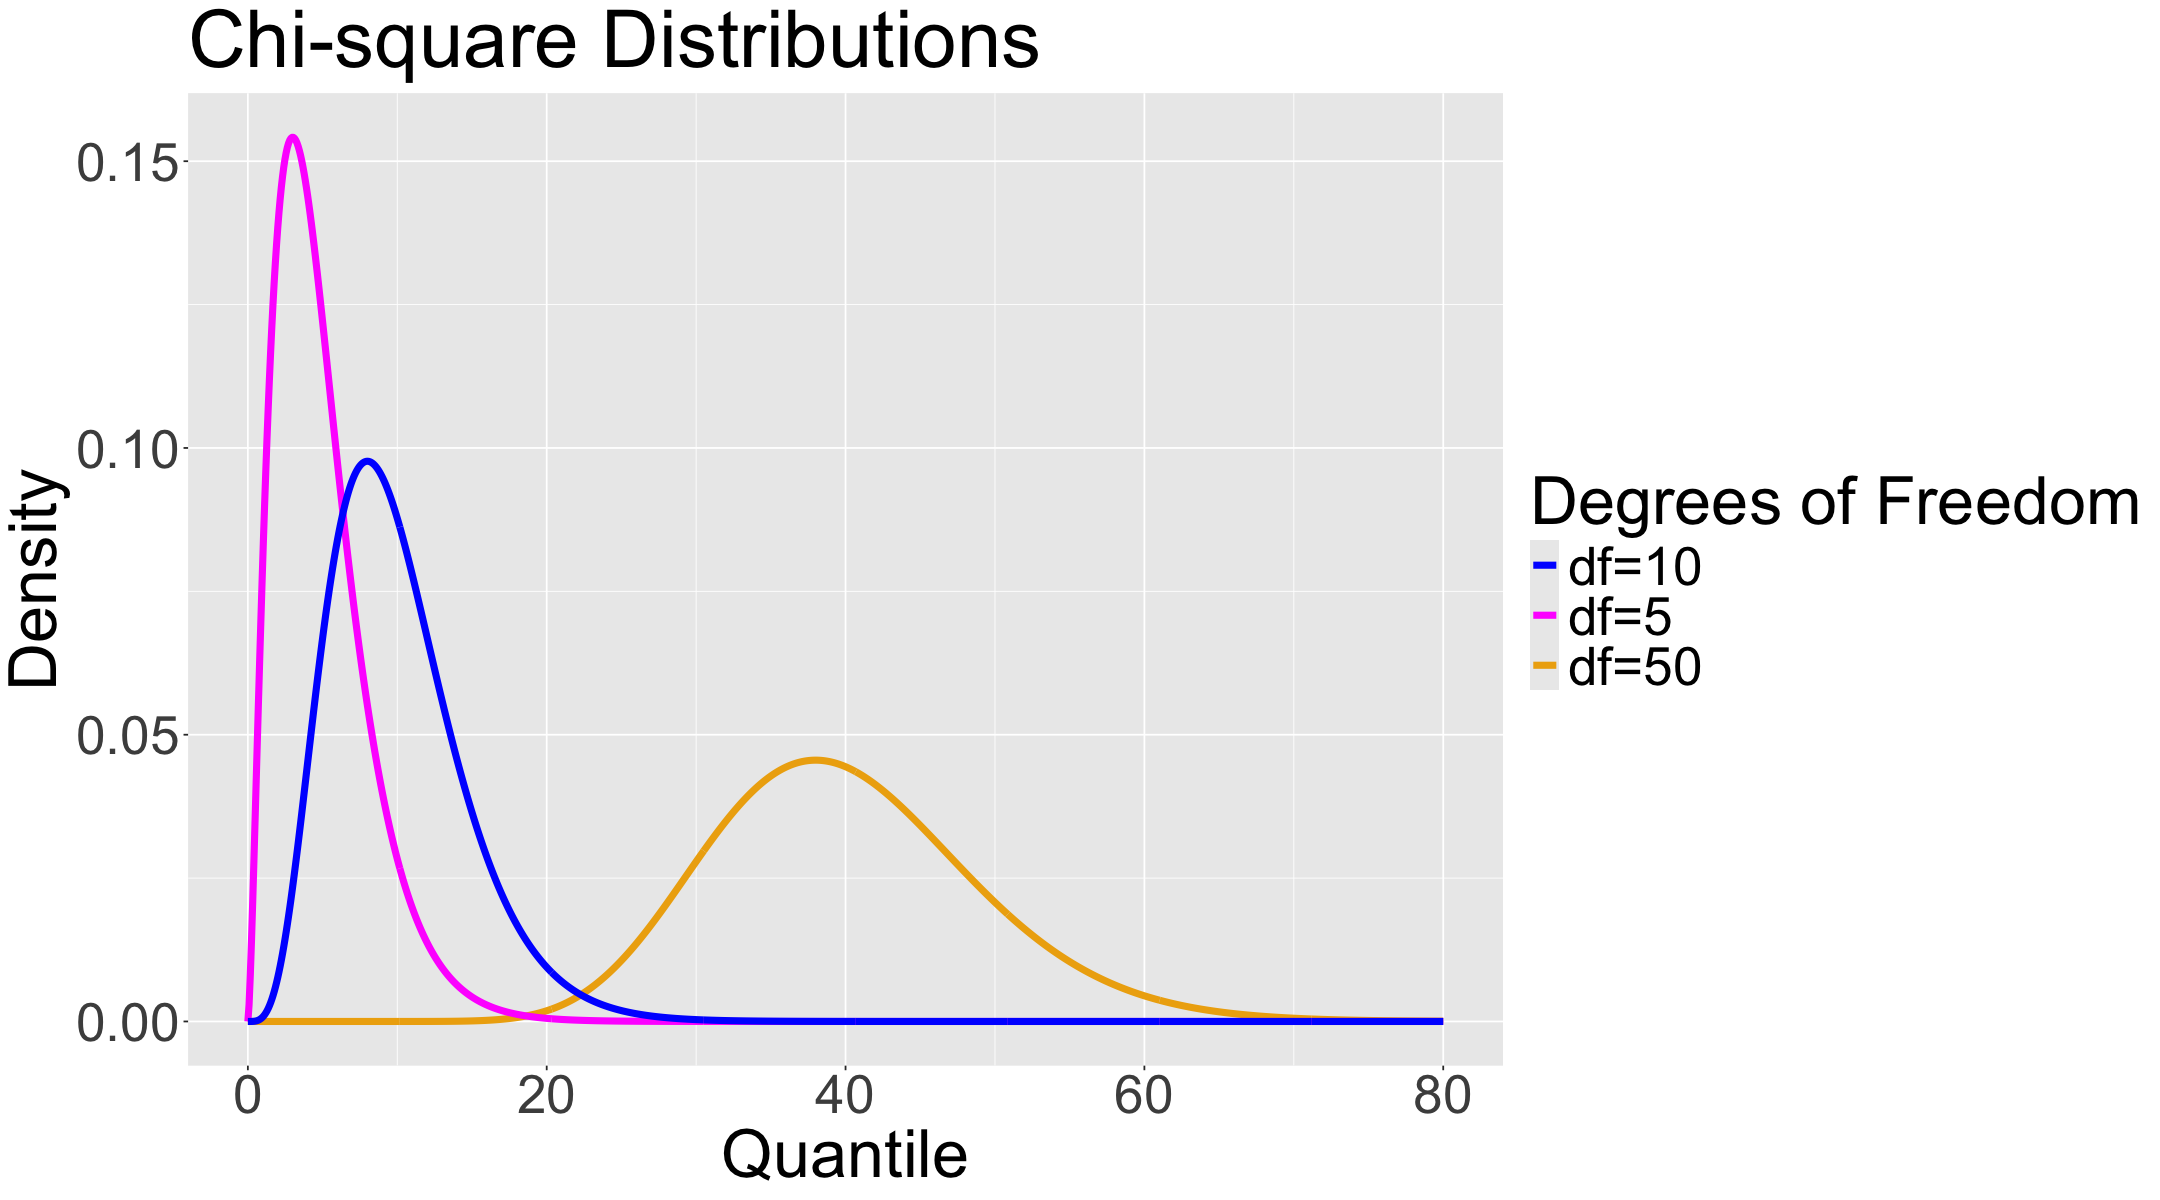

In [5]:
options(repr.plot.width = 18, repr.plot.height = 10)

chi_sq <- ggplot(data = data.frame(x = c(0, 80)), aes(x)) +
  stat_function(fun = dchisq, n = 1000, args = list(df=40), aes(colour = "df=50"), size = 2) +
  stat_function(fun = dchisq, n = 1000, args = list(df=5), aes(colour = "df=5"), size = 2) +
  stat_function(fun = dchisq, n = 1000, args = list(df=10), aes(colour = "df=10"), size = 2) +
  ylab("") +
  xlab("") +
  scale_colour_manual("Degrees of Freedom", values = c(
    "blue", "magenta","darkgoldenrod2"
  ))+
  theme(text = element_text(size = 40)) +
  labs(x = "Quantile", y = "Density") +
  ggtitle("Chi-square Distributions")
chi_sq

> *Note: Due to the nature of the Chi-square distribution, all Chi-square tests are right-tailed (never double the p-value!)*

### 1.1. Goodness of Fit

Given a categorical variable, we can use the **Chi-Square Goodness of Fit Test** to determine if the sample is representative of the population or some specified distribution. The goodness of fit test can be applied when we are looking at the distribution of **one** categorical variable. We will begin by looking at an example.

The Premier League is the top level of football in England. In London, three of the most popular teams based on their social media following are Arsenal F.C., Chelsea F.C. and Tottenham Hotspur F.C. The FA Cup is the oldest football competition in the world and was developed in the late 1800's. One might hypothesize that the distribution of FA cup wins amongst London's most popular teams is approximately even over the many years of the tournament's history. Let's verify this with a Chi-square goodness of fit test! 

<div style="text-align: center;">
    <img src="img/wembley.jpg" width="500" alt="Wembley Stadium">
</div>

In [3]:
FA_cup <- read_csv("data/FA_cup.csv")

Rows: 44 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Club
dbl (1): 
Wins

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
FA_cup

In [ ]:
top_london_clubs <- FA_cup |> 
                       filter(Club == "Arsenal" | Club == "Chelsea" | Club == "Tottenham Hotspur")
top_london_clubs

To perform the hypothesis test, we need to establish the null and alternative hypotheses. 

$H_0$: The proportion of wins is equal amongst the three teams (i.e., $p_{A}=p_{C}=p_{T}=1/3$). 

$H_A$: At least one of the team's win proportions is not as specified. 

The observed counts are given in the table above: $$O=(O_1,O_2,O_3)=(14,8,8)$$

The expected counts can be computed using the formula $E_i=N \times p_i$. In this case, all of the hypothesized proportions are equal (1/3), but in other cases its possible to have different proportions depending on the question at hand. 

For $i=1,2,3$, $E_i=30 \times 1/3=10$.

The test statistic can then be computed as 

$$X_0^2 = \sum_{i=1}^3 \frac{(O_i-E_i)^2}{E_i}=\frac{(14-10)^2}{10}+\frac{(8-10)^2}{10}+\frac{(8-10)^2}{10}=1.6+0.4+0.4=2.4$$

In [ ]:
observed = c(14,8,8)
expected = rep(10, 3)

sum((observed-expected)^2/expected)

For the Chi-square goodness of fit test, the distribution of the test statistic under the null hypothesis follows a Chi-square distribution with $c-1$ degrees of freedom, where $c$ is the number of levels of the categorical variable. In our example, $c=3$ so the null distribution is $\chi^2_{c-1}=\chi^2_{3-1}=\chi^2_2$.

The p-value can then be computed as 

In [ ]:
pchisq(2.4, df=2, lower.tail=FALSE)

Using $\alpha=0.05$, the p-value of 0.301 is larger than 0.05 so we fail to reject the null hypothesis and we do not have sufficient evidence to conlude that any of the proportions are different than what was specified. In other words, the proportion of FA cup wins is distributed approximately evenly amongst the three teams. 

We can perform this test using the `chisq.test()` function in R. The argument `correct` refers to Yates' continuity correction.

In [ ]:
chisq.test(x = observed, correct=FALSE)

We can look at the individual contributions of different category levels to the chi-squared test statistic. In this case, while Arsenal had the greatest contribution, we still did not have evidence that this proportion was significantlty different from what we hypothesized.

### 1.2. Test of Independence/Homogeneity

If we are interested in comparing two categorical variables, we can consider the Chi-squared test for independence or homogeneity. The tests are equivalent mathematically, but the difference is in the phrasing of the research question.

- Indepdence: "Is the distribution of one variable dependent upon another variable?" For example, looking at whether socioeconomic status (low, medium, high income) depends on education level.

- Homogeneity: "Is the distribution of one variable distributed homogenously across the levels of another categorical variable?" For example, is the distribution of majors in the faculty of science the same for Canadian vs. international students?

We can return to our example of click-through rate from the previous lecture. In our example, these two categorical variables are the following:

- **Treatment:** A factor-type column indicating treatment type (column `webpage` in `click_through`).
- **Outcome:** Whether the user clicked or not on the link of interest (column `click_target` in `click_through`, `0` for "No" and `1` for "Yes").

In [ ]:
click_through <- read_csv("data/click_through.csv")

click_through

The first stelibrary(janitor)

cont_table_AB <- click_through %>%
  tabyl(webpage, click_target)
cont_table_ABp of this approach is to build a **contingency table**. This is merely a cross-tabulation between the levels of **Treatment** and **Outcome**. We can easily generate this table via function `tabyl()` from package `janitor`.

In [ ]:
cont_table_AB <- click_through %>%
  tabyl(webpage, click_target)
cont_table_AB

Now, the hypotheses in this test are the following:

$H_0$: The CTR is independent from the webpage version (*Interact* versus *Services*).

$H_a$: The CTR is not independent from the webpage version (*Interact* versus *Services*).

In general, an **observed** $2 \times 2$ contigency table (with categorical variables $A$ and $B$ whose respective levels are $1$ and $2$) can be put as follows:

|              |  Level $B_1$  | Level $B_2$ | Row Total |
|------------|-------------|-------------|-----------|
|  Level $A_1$ |   $O_{1,1}$   | $O_{1,2}$   | $O_{1,.}$     |
|  Level $A_2$ |   $O_{2,1}$   | $O_{2,2}$   | $O_{2,.}$        |
| **Column Total** | $O_{.,1}$ |       $O_{.,2}$      |     $N$      |

In our example, 

|              | 0  | 1 | Row Total |
|------------|-------------|-------------|-----------|
|  Interact |   2354  | 69   | 2423    |
|  Services |   1236   | 63   | 1299      |
| **Column Total** | 3590|       132     |     Grand Total: 3722     |


This test also requires the computation of **expected** frequencies (what we would expect in our sample **under the null distribution** assuming categorical variables $A$ and $B$ are independent).

The expected absolute frequency associated to the $i$th row and the $j$th column is computed as:

$$E_{i, j} = \frac{R_i \times C_j}{N},$$

where $R_i$ is the total of the $i^{th}$ row and $C_j$ is the total of the $j^{th}$ column. In our case, $E_{1,1}=\frac{2423\times 3590}{3722}=2337.069$, for example. This yields a table of expected counts:


|              |  Level $B_1$  | Level $B_2$ | Row Total |
|------------|-------------|-------------|-----------|
|  Level $A_1$ |   $E_{1,1}$   | $E_{1,2}$   | $E_{1,.}$     |
|  Level $A_2$ |   $E_{2,1}$   | $E_{2,2}$   | $E_{2,.}$        |
| Column Total | $E_{.,1}$ |       $E_{.,2}$      |     $N$      |

We can compute the test statistic as

$$\chi_0^2 = \sum_{i=1}^r \sum_{j=1}^c \frac{(O_{i,j}-E_{i,j})^2}{E_{i,j}},$$

where $r$ is the number of levels of the row variable and $c$ is the number of levels of the column variable. The test statistic follows a $\chi^2_{(r-1)(c-1)}.

Luckily, we do not have to compute all these values by hand; the base `R` function `chisq.test()` is used to perform test. It only needs your `tabyl()` object (e.g., `cont_table_AB`).


Note the output `X-squared` is $9.91$ as in `prop.test()`.

In [ ]:
chisq.test(cont_table_AB, correct = FALSE)

Given that our $p$-value is < 0.05, we have enough statistical evidence to reject the null hypothesis $H_0$ and can conclude that the CTR is not independent from the webpage version (*Interact* versus *Services*).

Do you notice anything? The test statistic and $p$-value match the results we got using the two-sample proportion test! This is because when $r=c=2$ (i.e., a Chi-squared test with 1 degree of freedom), the Chi-squared test for independence is equivalent to the two-sample proportion test. The main difference is that the Chi-squared test for independence allows us to consider categorical variables with more than two levels.

## 2. One-Way Analysis of Variance

Sometimes, we will need to compare the means of more than two groups. That's where Analysis of Variance (ANOVA) comes in! You might ask yourself: if we are comparing means, why is it called ANO**V**A instead of "ANO**M**A"? Look at the following motivating exmaple. Suppose we have three distributions with means of 2, 4, and 6. Are these means significantly different? Well, it depends on the variance! Look at the following two plots.

In [ ]:
options(repr.plot.width = 18, repr.plot.height = 6)

p_dist1 <- ggplot(data = data.frame(x = c(-4, 12)), aes(x)) +
  stat_function(fun = dnorm, n = 100, args = list(mean = 2, sd = 2), aes(colour = "Distribution 1"), size = 2) +
  stat_function(fun = dnorm, n = 100, args = list(mean = 4, sd = 2), aes(colour = "Distribution 2"), size = 2) +
 stat_function(fun = dnorm, n = 100, args = list(mean = 6, sd = 2), aes(colour = "Distribution 3"), size = 2) +
  scale_colour_manual("Distribution", values = c(
    "blue", "magenta", "darkgoldenrod2"
  )) +
  ylab("density") +
  xlab("") +
  ggtitle("Plot 1: Comparison of Distributions") +
  theme(text = element_text(size = 20))
p_dist1

In [ ]:
p_dist2 <- ggplot(data = data.frame(x = c(-2, 10)), aes(x)) +
  stat_function(fun = dnorm, n = 100, args = list(mean = 2, sd = 0.5), aes(colour = "Distribution 1"), size = 2) +
  stat_function(fun = dnorm, n = 100, args = list(mean = 4, sd = 0.5), aes(colour = "Distribution 2"), size = 2) +
 stat_function(fun = dnorm, n = 100, args = list(mean = 6, sd = 0.5), aes(colour = "Distribution 3"), size = 2) +
  scale_colour_manual("Distribution", values = c(
    "blue", "magenta", "darkgoldenrod2"
  )) +
  ylab("density") +
  xlab("") +
  ggtitle("Plot 2: Comparison of Distributions") +
  theme(text = element_text(size = 20))
p_dist2

In both plots, there are three distributions with centers of 2, 4 and 6. However, in plot 1, I would argue that there doesn't appear to be much difference in group means, while in plot 2 there is a much clearer separation of group means. This is why we can't simply compare group means and must take the variation into account!

### 2.1. ANOVA Hypotheses

In this class, we will be considering one-way ANOVA, where we will compare group means of a response across one categorical variable. 

$H_0$: All means are equal ($\mu_1=\mu_2=...=\mu_K$).

$H_A$: Not all means are equal.

> Note: The alternative hypothesis is **not** stating that $\mu_1\neq \mu_2\neq ...\neq \mu_K$, but rather that there exists at least one (maybe more) difference in means! 

### 2.2. $F$-test



Once we have set up our hypotheses, we need to compute a test statistic. The test statistic for one-way ANOVA is defined by the formula

$$F_0= \frac{\text{between group variability}}{\text{within group variability}}=\frac{MS_T}{MS_E}=\frac{SS_T/df_T}{SS_E/df_E}$$

where

-  $SS_T=\sum_{k=1}^Kn_k(\bar{Y}_k-\bar{Y})^2$ is the treatment sum of squares, with $n_k$ being the sample size of the $k^{th}$ group such that $\sum_{k=1}^Kn_k=N$
- $df_T=K-1$ is the treatment degrees of freedom 
- $SS_E=\sum_{k=1}^K\sum_{i=1}^{n_k} n_k({Y}_{ik}-\bar{Y}_k)^2$ is the error sum of squares
- $df_E=N-K$ is the error degrees of freedom 
- Treatment mean square: $MS_T=SS_T/df_T$  
- Error mean square: $MS_E=SS_E/df_E$

Under the null hypothesis, the test statistic follows an $F$-distribution with $K-1$ numerator degrees of freedom and $N-K$ denominator degrees of freedom (Notation: $F_{N-K}^{K-1}$). The intuition beheind the test statistic is to compare the variability between groups and within groups. If the variability between the groups is much large relative to the variability within groups, the test statistic will be significant, indicating that not all of the means are equal. 


All of these quantities can conveniently be arranged into an ANOVA table as follows: 
| Source    | $SS$   | $df$ | $MS$   | $F$     | $p$-value |
|-----------|--------|------|--------|---------|-----------|
| Treatment | $SS_T$ | $df_T$ | $MS_T$ | $F_{0}=MS_T/MS_E$ | Compute using $F_{N-K}^{K-1}$|
| Error     | $SS_E$ | $df_E$ | $MS_E$ |         |           |
| Total     | $SS_{TOT}$ | $df_{TOT}$ |        |         |           |

From the ANOVA table, $SS_{TOT}= SS_T+SS_E$ which is the ANOVA identity. It shows how the variation can be broken into two parts: the treatment sum of squares (between group variability) and error sum of squares (within group variability). Also, the total degrees of freedom can be computed as $df_{TOT}=(K-1)+(N-K)=N-1$.

Another important thing to note is that $MS_E$ is an estimate of the "pooled" or "common" variance (this will tie into the assumptions for ANOVA discussed below).

### 2.3 Example: Penguins Data

We will now use the `penguins` data set to outline how to perform one-way ANOVA in R by comparing the average body mass of penguins amongst the three species.

In [ ]:
library(palmerpenguins)

In [ ]:
head(penguins)

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(penguins, aes(x = species, y = flipper_length_mm, fill = species)) +
  geom_boxplot() + 
  scale_fill_manual(values = c(
    "blue", "magenta", "darkgoldenrod2"
  ))+
  labs(title = "Flipper Length of Penguins by Species",
       x = "Species",
       y = "Flipper Length  (mm)")

Our hypotheses for one-way ANOVA are 

$H_0$: All mean flipper lengths are equal ($\mu_{\text{Adelie}}=\mu_{\text{Chinstrap}}=\mu_{\text{Gentoo}}$).

$H_A$: Not all mean flipper  lengths are equal.

We can use the `aov` function to generate an ANOVA table. 

In [ ]:
res <- aov(flipper_length_mm ~ species, data = penguins)

summary(res)

With an extremely small $p$-value, we reject the null hypothesis and conclude that not all mean bill lengths are equal.

So, we know that at least two group means are different, but which ones? This leads us to the idea of **post-hoc tests** which will be covered in more detail in DSCI 554. 

> *Note: Never double the p-value for an $F$-test!*

### 2.4. ANOVA Assumptions

The assumptions for one-way ANOVA are:

- Normality: the residuals are approximately normally distributed (can verify using QQ-plots or Shapiro Wilk's test for normality)
- Equal variance: population variances are the same for each group (can verify using Levene's test)
- Independent observations

We can look at how these assumptions hold up for the penguins data:


In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

qqnorm(res$residuals)

In [ ]:
shapiro.test(res$residuals)

From the QQ-plot, the points don't deviate much from the diagonal line indicating that normality is not violated. This is confirmed by the Shapiro-Wilk normality test ($p$-value$ >0.05$).

In [ ]:
library(car)

leveneTest(flipper_length_mm ~ species, data = penguins)

The $p$-value for Levene's test (0.72) is larger than $0.05$ so we can conclude the equal variance assumption is not violated.

### 2.5. Relationship with the $t$-test

If we are only comparing the means of two groups, one-way ANOVA is equivalent to the two-sample $t$-test. The $p$-values will be the same, but the test statistics will be slightly different. However, similar to the two-sample proportion test and chi-squared test, there is also a relationship between the test statistics for two-sample $t$-test and one-way ANOVA. If we use the same data and assume equal variances, $t^2 \approx F$.

In [ ]:
Gentoo_flip <- penguins |>
              filter(species == "Gentoo") |>
              select(flipper_length_mm)

Adelie_flip <- penguins |>
              filter(species == "Adelie") |>
              select(flipper_length_mm)

In [ ]:
t.test(Gentoo_flip, Adelie_flip, var.equal=TRUE)

In [ ]:
penguin_two_species <- penguins |>
                            filter(species == "Gentoo" | species == "Adelie")

In [ ]:
res2 <- aov(flipper_length_mm ~ species, data = penguin_two_species)

summary(res2)

We can see that the $p$-values of the two tests are the same, and squaring the test statistic from the $t$-test we get (approximately) the same value as the test statistic from the $F$-test:

In [ ]:
(34.415)^2

## 3. Kruskal Wallis Test

What if we were to consider the bill length instead of flipper length in the previous example?

In [ ]:
res3 <- aov(bill_length_mm ~ species, data = penguins)

summary(res3)

Checking the normality assumption:

In [ ]:
qqnorm(res3$residuals)
shapiro.test(res3$residuals)

Uh oh! It seems like normality is violated... what should we do if we still want to compare the group means?

Nonparametric tests to the rescue! Many parametric hypothesis tests have a nonparametric counterpart in case the distributional assumptions are not valid. The nonparametric equivalent of one-way ANOVA is the **Kruskal Wallis Test**. This test involves making calculations based on the ranked response values in each group. 

Although we won't be going through all of the technical details of this test, it is important to know about and is easily implemented in R via the function:

In [ ]:
kruskal.test(bill_length_mm ~ species, data = penguins)

> *Note: If the assumptions of a parametric test hold, we usually prefer to implement that test over the nonparametric alternative as it is typically more powerful from a statistical perspective.*

## 4. What is next?

- Errors in statistical inference.
- There is only one test!

## 5. Acknowledgements

- [Open Intro Statistics](https://www.openintro.org/book/os/) by David Diez, Mine Cetinkaya-Rundel and Christopher D Barr
- [Stats and R: ANOVA in R](https://statsandr.com/blog/anova-in-r/#anova-in-r) by Antoine Soetewey
- [Learning Statistics with R](https://learningstatisticswithr.com/) by Danielle Navarro
- [Modern Dive: An Introduction to Statistical and Data Sciences via R](https://moderndive.com/index.html) by Chester Ismay and Albert Y. Kim